In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
def give_Test_engine(Test_no,engine_id):
    "Test_no, is the Sl.no of Test-set"
    "engine_id, is the ID of engine"
    import pandas as pd
    import numpy as np
    df=pd.read_csv("Processed_Test_00{}.csv".format(Test_no))
    test = df[df['ID']==engine_id]
    test = test.drop(columns=['ID'])
    X_test=test.iloc[:,:-1]
    y_test=test.iloc[:,-1]
    return X_test,y_test

In [7]:
def give_Train_engine(Train_no,engine_id):
    "Train_no, is the Sl.no of Train-set"
    "engine_id, is the ID of engine"
    import pandas as pd
    import numpy as np
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    train = df[df['ID']==engine_id]
    train = train.drop(columns=['ID'])
    X_train=train.iloc[:,:-1]
    y_train=train.iloc[:,-1]
    return X_train,y_train

# Importing all the training data

In [10]:
df1 = pd.read_csv('Processed_Train_001.csv')
df2 = pd.read_csv('Processed_Train_002.csv')
df3 = pd.read_csv('Processed_Train_003.csv')
df4 = pd.read_csv('Processed_Train_004.csv')

df=pd.concat([df1,df2,df3,df4])

# Dividing into Features and Target

In [13]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

# Training a Random Forest Regression Model

In [16]:
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
y_pred = regressor.predict(X_test)
print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

y_pred_train = regressor.predict(X_train)
print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

RMSE on Test set: 58.61909773936627
RMSE on Training set: 12.924987853186256


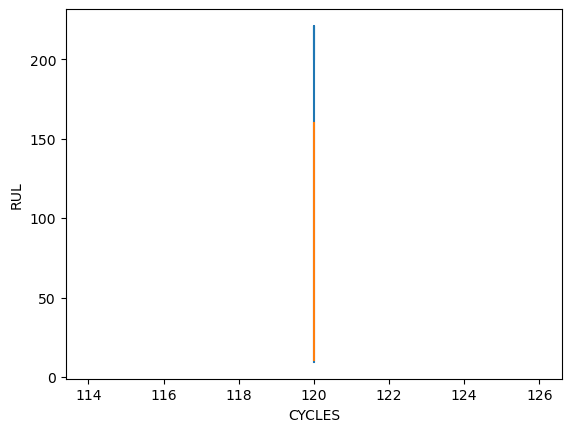

In [18]:
a,b=250,400
rang = list(range(a,b))
plt.plot(np.array(X_test)[rang,0],y_pred[rang])
plt.plot(np.array(X_test)[rang,0],np.array(y_test)[rang])

plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()

# Doing Grid Search for Hyperparameters Tuning

**n_estimators:** The more trees, the less likely the algorithm is to overfit. So try increasing this parameter. The lower this number, the closer the model is to a decision tree, with a restricted feature set.

**max_depth:** This parameter will reduce the complexity of the learned models, lowering over fitting risk (keep it low e.g. 2,3,4). 

**min_samples_leaf:** Try setting these values greater than one. This has a similar effect to the max_depth parameter, it means the branch will stop splitting once the leaves have that number of samples each.

In [24]:
# param_grid = {'max_features': 'log2', 'n_estimators': 350}
# RF = GridSearchCV(RandomForestRegressor(), param_grid = param_grid,scoring = "neg_root_mean_squared_error",
#                     n_jobs = -1, cv = 10)
# RF.fit(X_train,y_train)

# y_pred = RF.predict(X_test)
# print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# y_pred_train = RF.predict(X_train)
# print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

In [26]:
RF = RandomForestRegressor( n_estimators= 400)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

y_pred_train = RF.predict(X_train)
print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

RMSE on Test set: 58.268674536386136
RMSE on Training set: 12.705738373004355


# Moving Average

In [28]:
def moving_average(window_size,y_pred):
    numbers_series = pd.Series(y_pred)
    windows = numbers_series.rolling(window_size)
    moving_averages = windows.mean()

    moving_averages_list = moving_averages.tolist()
    y_pred_avg = moving_averages_list[window_size - 1:]
    return y_pred_avg

In [17]:
X_test,y_test=give_engine(1,10)############ Function
y_pred = RF.predict(X_test)

window_size=10
y_pred=moving_average(window_size,y_pred)

print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test[0:len(y_pred)], y_pred)))

plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.legend(['Prediction','Actual'])
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ID


# Performance on Train Set

ValueError: x and y must have same first dimension, but have shapes (481,) and (128287,)

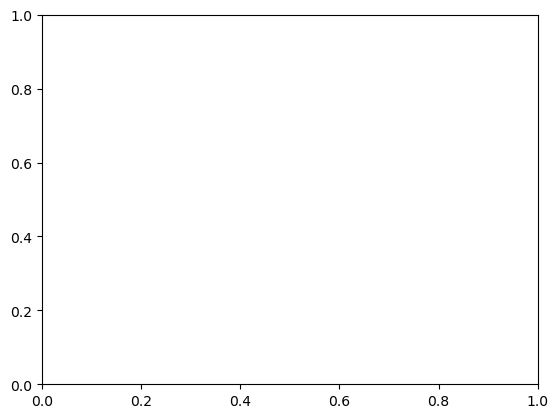

In [18]:
X1,y1=give_Train_engine(3,10)

y_pred_train = RF.predict(X_train)

plt.plot(X1['Cycle'],y_pred_train)
plt.plot(X1['Cycle'],y1)
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.show()


print('RMSE on Train set:', np.sqrt(metrics.mean_squared_error(y1 ,y_pred_train)))